The **fastai** Deep Learning Library
===
> Documentation and tutorial: https://docs.fast.ai

Package versions and available devices:

In [8]:
import fastai
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"fastai version : {fastai.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"Number of GPUs : {torch.cuda.device_count()}")
print(f"Device         : {device}")

/mnt/mbi/home/muratmbit/miniconda3/envs/fastai/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


fastai version : 2.7.12
PyTorch version: 1.12.1
Number of GPUs : 1
Device         : cuda


In [9]:
from fastai.vision.all import *

In [10]:
from pathlib import Path

In [11]:
data_path = Path('/mnt/mbi/images/micros/murat/dataDIR/maria_21072023/')

In [12]:
print('Folder names (i.e. labels):\n',
      [p.name for p in data_path.ls() if p.is_dir()])

Folder names (i.e. labels):
 ['no', 'yes']


In [13]:
# image file names in the data_path/*/*
img_fns = get_image_files(data_path)

In [14]:
# image label
parent_label(img_fns[0])

'no'

In [15]:
tcat = Categorize(vocab=['no','yes'])
# To decode use: lbld = tcat.decode(lbl)

In [16]:
fn = img_fns[10]; fn

Path('/mnt/mbi/images/micros/murat/dataDIR/maria_21072023/no/liveJun8-02.czi - liveJun8-02.czi #017-3_n.tif')

In [35]:
import skimage.io

def imread2pil(fpath):
    '''
    read the middle frame and convert to PIL image.
    '''
    im = skimage.io.imread(str(fpath))
    # later need to add normalization for each channel,
    # now only CH1 of CH:0-2
    im = np.uint8( 255 * (im/im[:,:,:,1].max()) )
    return PILImage.create(im[im.shape[0]//2][:,:,1])

In [36]:
im1 = skimage.io.imread(str(fn))
im1 = im1 / im1[:,:,:,1].max()
im1.shape

(9, 435, 276, 3)

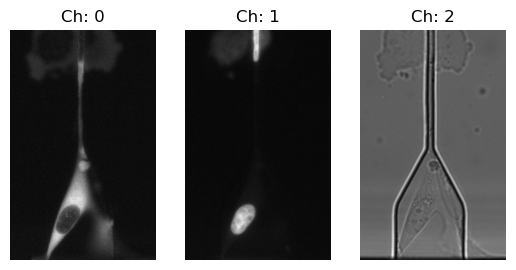

In [37]:
k = im1.shape[0]//2 # frame idx
img_k = im1[k] # select frame

_, axs = plt.subplots(ncols=im1.shape[-1])
cmps = ['gray','gray','gray']
for ch,ax in enumerate(axs):
    ax.imshow(img_k[:,:,ch], cmap=cmps[ch])
    ax.set_title(f'Ch: {ch}')
    ax.axis(False)
plt.show()

In [38]:
img_k[:,:,1]

array([[0.07329463, 0.07184325, 0.06676343, ..., 0.06966618, 0.06313498,
        0.06095791],
       [0.07692308, 0.07256894, 0.05805515, ..., 0.05297533, 0.06386067,
        0.06748911],
       [0.07184325, 0.06966618, 0.07256894, ..., 0.0682148 , 0.05587808,
        0.06240929],
       ...,
       [0.07184325, 0.0820029 , 0.09143687, ..., 0.07619739, 0.06386067,
        0.08563135],
       [0.08998549, 0.07910015, 0.07982583, ..., 0.07184325, 0.0682148 ,
        0.0820029 ],
       [0.07982583, 0.08708273, 0.07692308, ..., 0.08055152, 0.06676343,
        0.06458636]])

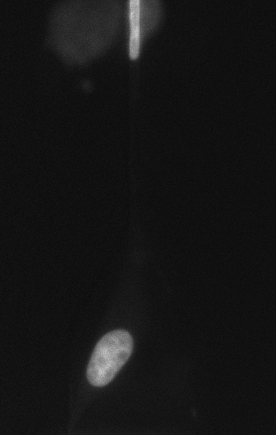

In [39]:
imgpil = PILImage.create(np.uint8(255*img_k[:,:,1]))
imgpil

In [40]:
tconv = ToTensor()

In [41]:
(tconv(img_k[:,:,:])).shape

(435, 276, 3)

In [43]:
tconv(imread2pil(fn))

TensorImage([[[18, 18, 17,  ..., 17, 16, 15],
              [19, 18, 14,  ..., 13, 16, 17],
              [18, 17, 18,  ..., 17, 14, 15],
              ...,
              [18, 20, 23,  ..., 19, 16, 21],
              [22, 20, 20,  ..., 18, 17, 20],
              [20, 22, 19,  ..., 20, 17, 16]]], dtype=torch.uint8)

In [44]:
tconv(imgpil)

TensorImage([[[18, 18, 17,  ..., 17, 16, 15],
              [19, 18, 14,  ..., 13, 16, 17],
              [18, 17, 18,  ..., 17, 14, 15],
              ...,
              [18, 20, 23,  ..., 19, 16, 21],
              [22, 20, 20,  ..., 18, 17, 20],
              [20, 22, 19,  ..., 20, 17, 16]]], dtype=torch.uint8)